### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

### Try persistent homology

In [ ]:
topic = 'biochemistry'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [187]:
%time networks[topic].barcodes

wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 11234/11251
CPU times: user 3.92 s, sys: 882 ms, total: 4.8 s
Wall time: 5.36 s
CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11.9 µs


,dim,birth,death,birth simplex,death nodes,death simplex
0,0,-2500,inf,[Carbon],[],[]
1,0,-2500,800.0,[Nutrition],[Ethanol],"[Ethanol, Ammonia]"
2,0,-2000,-2000.0,[Alcohol],[Alcohol],"[Carbon, Alcohol]"
3,0,-2000,1600.0,[Medicine],[Life],"[Life, Microbiology]"
4,0,-2000,-2000.0,[Pharmacist],"[Medicine, Pharmacist]","[Medicine, Pharmacist]"
...,...,...,...,...,...,...
6041,5,1911,1911.0,"[Electron, Proton, Atomic nucleus, Atomic numb...",[Atomic nucleus],"[Atom, Electron, Proton, Atomic nucleus, Atomi..."
6042,5,1911,1911.0,"[Electron, Atomic nucleus, Neutron, Atomic num...",[Atomic nucleus],"[Atom, Electron, Atomic nucleus, Neutron, Atom..."
6043,5,1911,1911.0,"[Hydrogen, Proton, Atomic nucleus, Neutron, At...",[Atomic nucleus],"[Atom, Hydrogen, Proton, Atomic nucleus, Neutr..."
6044,5,1911,1911.0,"[Proton, Atomic nucleus, Neutron, Atomic numbe...",[Atomic nucleus],"[Atom, Proton, Atomic nucleus, Neutron, Atomic..."


### Plot

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='white', font_scale=2)

In [285]:
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [283]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

CPU times: user 55.6 s, sys: 974 ms, total: 56.6 s
Wall time: 1min 6s
CPU times: user 1min 19s, sys: 1.06 s, total: 1min 20s
Wall time: 1min 25s


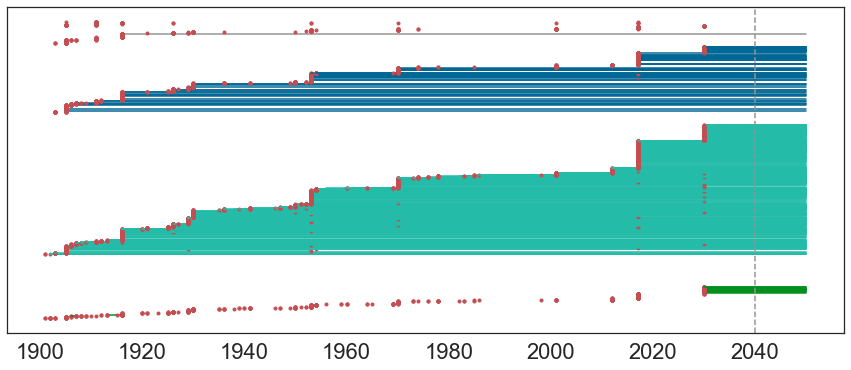

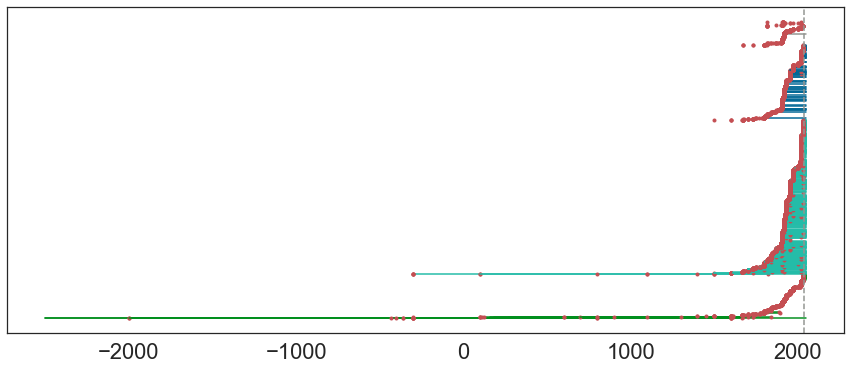

In [289]:
barcodes = networks[topic].barcodes
%time plot_barcodes(barcodes.loc[barcodes['birth']>1900])
plt.title(topic)
%time plot_barcodes(barcodes)
# %time plot_persistence_diagram(barcodes.loc[barcodes['birth']>1900])

### Persistent homology for all topics

In [ ]:
topics = ['anatomy', 'biochemistry', 'cognitive science', 'evolutionary biology',
          'genetics', 'immunology', 'molecular biology']
topics += ['chemistry', 'biophysics', 'energy', 'optics', 
           'earth science', 'geology', 'meteorology']
# philosophy
# topics += []
topics += ['philosophy of language', 'philosophy of law', 
           'philosophy of mind', 'philosophy of science']
# social sciences
topics += ['economics', 'accounting', 'education', 'linguistics',
           'law', 'psychology', 'sociology']
technology & applied sciences
topics += ['electronics', 'software engineering', 'robotics']
topics += ['physics']

In [22]:
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'

In [83]:
import wiki

networks = {}
for topic in topics:
    networks[topic] = wiki.Net()
    networks[topic].load_graph(path_saved + topic + '.gexf')
networks

{'biochemistry': <wiki.Net at 0x14177ccd0>}

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='white', font_scale=2)
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [ ]:
for topic, network in networks.items():
    print('Topic: ' + topic)
    %time plot_barcodes(network.barcodes)
    plt.title(topic)
    plt.savefig(path_saved + topic + '.png')

### Identify important nodes